### Single Nucleus

#### HTAPP-895-SMP-7359

In [1]:
# Set paths to data and result
path_to_data <- "path/to/data/"
path_to_results <- "path/to/results/"

In [2]:
libraries <- c("ggplot2", "Seurat", "glue", "dplyr", "anndata", 
               "data.table", "Matrix", "mltools", "enrichR", "R.utils")
lapply(libraries, function(x) suppressMessages(require(x, character.only = TRUE,quietly=TRUE,warn.conflicts = FALSE)))

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

In [3]:
sample <- "HTAPP-895-SMP-7359"

In [6]:
# Assumes you're working in the repository root directory
source("code/utils.R")

In [ ]:
# Uncomment below to use reticulate to set the conda environment

#library(reticulate)
#use_condaenv(condaenv = "SlideCNA_env") #if error, set conda environment manually for reticulate

In [ ]:
# Inputs needed:
# sn/scRNA-seq: 
#  counts
#  annotated cells/nuclei with cell/nuclei labels and cluster type (Malignant, Non-malignant)
#  position of genes on chromosomes 

In [7]:
# Read inputs
counts <- read.table(paste0(path_to_data, sample, "_scRNA-seq_counts.txt"), check.names = FALSE)
cells_df <- read.table(paste0(path_to_data, sample, "_scRNA-seq_cells_df.txt"))
gene_pos <- read.table(paste0(path_to_data, "gene_pos.txt"))

In [8]:
# data.frame of sn/scRNA-seq counts genes x cells/nuclei
head(counts)

,HTAPP-895-SMP-7359-TST-channel1_AACCAACGTAATGCTC-1,HTAPP-895-SMP-7359-TST-channel1_GATCAGTTCTTACCGC-1,HTAPP-895-SMP-7359-TST-channel1_TGGTACAGTATGCTTG-1,HTAPP-895-SMP-7359-TST-channel1_CATGCTCCACGACCTG-1,HTAPP-895-SMP-7359-TST-channel1_CACGAATAGGTAATCA-1,HTAPP-895-SMP-7359-TST-channel1_TATGTTCTCACCTCAC-1,HTAPP-895-SMP-7359-TST-channel1_TAAGCCATCCTAGCCT-1,HTAPP-895-SMP-7359-TST-channel1_GGAAGTGTCGCTAAAC-1,HTAPP-895-SMP-7359-TST-channel1_CTGCCTACAGTAACAA-1,HTAPP-895-SMP-7359-TST-channel1_ATGAGGGCACACGTGC-1,...,HTAPP-895-SMP-7359-TST-channel2_TGGTAGTGTTCCTTGC-1,HTAPP-895-SMP-7359-TST-channel2_CGATCGGAGTATGGAT-1,HTAPP-895-SMP-7359-TST-channel2_GTTGTCCGTGGAATGC-1,HTAPP-895-SMP-7359-TST-channel2_ACTATTCAGCGCTGCT-1,HTAPP-895-SMP-7359-TST-channel2_TACCCACGTTCTTCAT-1,HTAPP-895-SMP-7359-TST-channel2_AGCGCCACAAACACCT-1,HTAPP-895-SMP-7359-TST-channel2_TTCACCGCAGCCGTTG-1,HTAPP-895-SMP-7359-TST-channel2_GACACGCCATCTCATT-1,HTAPP-895-SMP-7359-TST-channel2_ACGTACATCTGTTCAT-1,HTAPP-895-SMP-7359-TST-channel2_GTTATGGCAGTATGAA-1
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
MIR1302-2HG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL627309.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AC114498.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL669831.5,2,1,2,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
FAM87B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LINC00115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# data.frame of cell/nucleus metadata (cells/nuclei x annotations)
head(cells_df)

,replicate,condition,cell_type,labels_unif,labels_cl_unif,labels_cl_unif2_broad,compartments,cnv_pass_mal,Phase,n_genes_by_counts,total_counts,pct_counts_mt,n_counts,n_genes,total_counts_mt,leiden,bc,cluster_type
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<chr>
HTAPP-895-SMP-7359-TST-channel1_AACCAACGTAATGCTC-1,1,TST,MBC,Epithelial,Epithelial,Epithelial,Malignant,True,G1,7670,18898,7.551064,18898,7670,1427,8,HTAPP-895-SMP-7359-TST-channel1_AACCAACGTAATGCTC-1,Malignant
HTAPP-895-SMP-7359-TST-channel1_GATCAGTTCTTACCGC-1,1,TST,MBC,Epithelial,Epithelial,Epithelial,Malignant,True,G1,7349,19307,12.363391,19307,7349,2387,3,HTAPP-895-SMP-7359-TST-channel1_GATCAGTTCTTACCGC-1,Malignant
HTAPP-895-SMP-7359-TST-channel1_TGGTACAGTATGCTTG-1,1,TST,MBC,Epithelial,Epithelial,Epithelial,Malignant,True,G2M,7621,18535,9.576477,18535,7621,1775,0,HTAPP-895-SMP-7359-TST-channel1_TGGTACAGTATGCTTG-1,Malignant
HTAPP-895-SMP-7359-TST-channel1_CATGCTCCACGACCTG-1,1,TST,MBC,Epithelial,Epithelial,Epithelial,Malignant,True,G2M,7924,19107,10.666248,19107,7924,2038,0,HTAPP-895-SMP-7359-TST-channel1_CATGCTCCACGACCTG-1,Malignant
HTAPP-895-SMP-7359-TST-channel1_CACGAATAGGTAATCA-1,1,TST,MBC,Epithelial,Epithelial,Epithelial,Malignant,True,G1,7663,19976,14.627554,19976,7663,2922,3,HTAPP-895-SMP-7359-TST-channel1_CACGAATAGGTAATCA-1,Malignant
HTAPP-895-SMP-7359-TST-channel1_TATGTTCTCACCTCAC-1,1,TST,MBC,Epithelial,Epithelial,Epithelial,Malignant,True,G2M,7659,19827,8.321985,19827,7659,1650,0,HTAPP-895-SMP-7359-TST-channel1_TATGTTCTCACCTCAC-1,Malignant


### Run SlideCNA

In [8]:
library(SlideCNA)


Attaching package: 'SlideCNA'


The following object is masked from 'package:Seurat':

    SpatialPlot


The following object is masked from 'package:base':

    mode




In [9]:
output_directory <- file.path(path_to_results, "SlideCNA")
plot_directory <- file.path(output_directory, "plots")
dir.create(output_directory, showWarnings = FALSE)
dir.create(plot_directory, showWarnings = FALSE)

Regressing out nCount_RNA, percent.mito

Centering and scaling data matrix

PC_ 1 
Positive:  COL4A2, COL4A1, IGFBP7, LAMA4, CALD1, SPARC, LDB2, NRP1, FN1, MSRB3 
	   CACNA1C, ADGRF5, NXN, NOX4, RBMS3, ERG, LAMB1, KALRN, ADGRL2, GLIS3 
	   DCLK2, TIMP3, UACA, CHSY3, COL15A1, NID1, PTPRE, ADAMTS9-AS2, ZNF521, HMCN1 
Negative:  KRT19, ADCY1, TFF1, RPLP0, ESRP1, IGFBP4, COX6C, TFF3, ADIRF, CHPT1 
	   LINC00536, TMBIM6, MAL2, RPLP1, AC013652.1, SHANK2, ZNF552, CA8, PPM1E, PLEKHA7 
	   MGP, DSP, AGBL4, SLC9A3R1, SET, RPS2, MPPED2, S100A6, HIST1H2AC, LDHA 
PC_ 2 
Positive:  MSR1, TFEC, GPNMB, FPR3, NPL, DOCK8, SLCO2B1, MARCH1, AC074327.1, COLEC12 
	   FMNL2, SLC1A3, PIK3AP1, ABCA1, ST18, ALOX5, ABR, SYK, APBB1IP, IL18 
	   CHST11, TMEM51, RASSF4, ITGAX, SIGLEC1, DAPK1, DOCK2, SLC11A1, SLC8A1, KCNE1 
Negative:  PTPRG, TEAD1, FBXL7, CALD1, COL4A2, PARD3, ANTXR1, DLC1, PRKG1, PARVA 
	   COL4A1, MSRB3, CACNA1C, SOX5, IGFBP7, IGFBP4, TIMP3, PALLD, PDZRN3, NXN 
	   NOX4, ZFPM2, LAMB1, PLOD2, COL3A

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 9958
Number of edges: 306834

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8661
Number of communities: 16
Elapsed time: 0 seconds


Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
05:26:08 UMAP embedding parameters a = 0.9922 b = 1.112

05:26:08 Read 9958 rows and found 10 numeric columns

05:26:08 Using Annoy for neighbor search, n_neighbors = 30

05:26:08 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

05:26:09 Writing NN index file to temp file /local/scratch/47682387.1.interactive/Rtmp0R7ycn/file581674c2adcf

05:26:09 Searching Annoy index using 1 thread, search_k = 3000

05:26:12 Annoy recall = 100%

05:26:13 Commencing smooth kNN distance calibration using 1 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 830
Number of edges: 22362

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8069
Number of communities: 12
Elapsed time: 0 seconds


07:48:37 UMAP embedding parameters a = 0.9922 b = 1.112

07:48:37 Read 830 rows and found 10 numeric columns

07:48:37 Using Annoy for neighbor search, n_neighbors = 30

07:48:37 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

07:48:37 Writing NN index file to temp file /local/scratch/47682387.1.interactive/Rtmp0R7ycn/file58169ab7790

07:48:37 Searching Annoy index using 1 thread, search_k = 3000

07:48:37 Annoy recall = 100%

07:48:42 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

07:48:46 Initializing from normalized Laplacian + noise (using irlba)

07:48:46 Commencing optimization for 500 epochs, with 32434 positive edges

07:48:51 Optimization finished

Warning message in asMethod(object):
"sparse->dense coercion: allocatin

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 830
Number of edges: 22362

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8069
Number of communities: 12
Elapsed time: 0 seconds


07:50:28 UMAP embedding parameters a = 0.9922 b = 1.112

07:50:28 Read 830 rows and found 10 numeric columns

07:50:28 Using Annoy for neighbor search, n_neighbors = 30

07:50:28 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

07:50:28 Writing NN index file to temp file /local/scratch/47682387.1.interactive/Rtmp0R7ycn/file58167266e7d

07:50:28 Searching Annoy index using 1 thread, search_k = 3000

07:50:28 Annoy recall = 100%

07:50:32 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

07:50:36 Initializing from normalized Laplacian + noise (using irlba)

07:50:36 Commencing optimization for 500 epochs, with 32434 positive edges

07:50:41 Optimization finished

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3



Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Error in combine_vars(data, params$plot_env, vars, drop = params$drop) : 
  Faceting variables must have at least one value.
Error in go_terms_all_obj$en_clone : 
  $ operator is invalid for atomic vectors


Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 1.9 GiB"
Regressing out nCount_RNA, percent.mito

Centering and scaling data matrix

PC_ 1 
Positive:  KIF18B, KNL1, CIT, BUB1B, NUSAP1, AC091057.6, RACGAP1, CDK1, DIAPH3, TOP2A 
	   KIF4A, KIF11, KIF15, ANLN, CEP55, TPX2, CENPI, STIL, ASPM, MELK 
	   NEIL3, NCAPG, NDC80, CDCA2, C2orf48, MKI67, CENPE, TACC3, CEP152, CDC25C 
Negative:  TMEM232, FBXO32, PURPL, DACH1, GAS2, IGFBP5, SYT1, GRPR, CADM2, LINC01889 
	   EPHA7, SNTG1, NPY1R, ROBO2, CLIC6, CP, KYNU, TGM2, CYP4F22, RRAS2 
	   MAFA-AS1, FSIP2-AS1, DNAJC12, BMP5, CSMD3, PRMT3, SCNN1G, AC239868.3, MALAT1, HIST4H4 
PC_ 2 
Positive:  CADM2, SESN3, SYT1, NPY1R, C6orf141, DACH1, MTSS1, CXCL14, PCDH10, EPHA6 
	   SEZ6L, EDIL3, ROBO2, UNC5C, AP000787.1, NEGR1, REPS2, PCDH7, KCNC2, ASCL1 
	   ZNF804A, AC113383.1, ERICH3, ROBO1, KCND2, CSMD3, TPH1, GULP1, ITPR2, NELL1 
Negative:  LINC01889, GALNT18, HILPDA, ANKRD37, PDCD10, ALDH1L2, NDRG1, AC093001.1, EH

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 576
Number of edges: 20418

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6309
Number of communities: 6
Elapsed time: 0 seconds


08:01:49 UMAP embedding parameters a = 0.9922 b = 1.112

08:01:49 Read 576 rows and found 10 numeric columns

08:01:49 Using Annoy for neighbor search, n_neighbors = 30

08:01:49 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

08:01:49 Writing NN index file to temp file /local/scratch/47682387.1.interactive/Rtmp0R7ycn/file5816340b6a72

08:01:49 Searching Annoy index using 1 thread, search_k = 3000

08:01:50 Annoy recall = 100%

08:01:54 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

08:01:58 Initializing from normalized Laplacian + noise (using irlba)

08:01:58 Commencing optimization for 500 epochs, with 22432 positive edges

08:02:02 Optimization finished

Warning message in asMethod(object):
"sparse->dense coercion: allocati

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 576
Number of edges: 20418

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6309
Number of communities: 6
Elapsed time: 0 seconds


08:03:21 UMAP embedding parameters a = 0.9922 b = 1.112

08:03:21 Read 576 rows and found 10 numeric columns

08:03:21 Using Annoy for neighbor search, n_neighbors = 30

08:03:21 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

08:03:21 Writing NN index file to temp file /local/scratch/47682387.1.interactive/Rtmp0R7ycn/file58161e51332d

08:03:21 Searching Annoy index using 1 thread, search_k = 3000

08:03:21 Annoy recall = 100%

08:03:26 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

08:03:30 Initializing from normalized Laplacian + noise (using irlba)

08:03:30 Commencing optimization for 500 epochs, with 22432 positive edges

08:03:34 Optimization finished

Calculating cluster 1

Calculating cluster 2



Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.


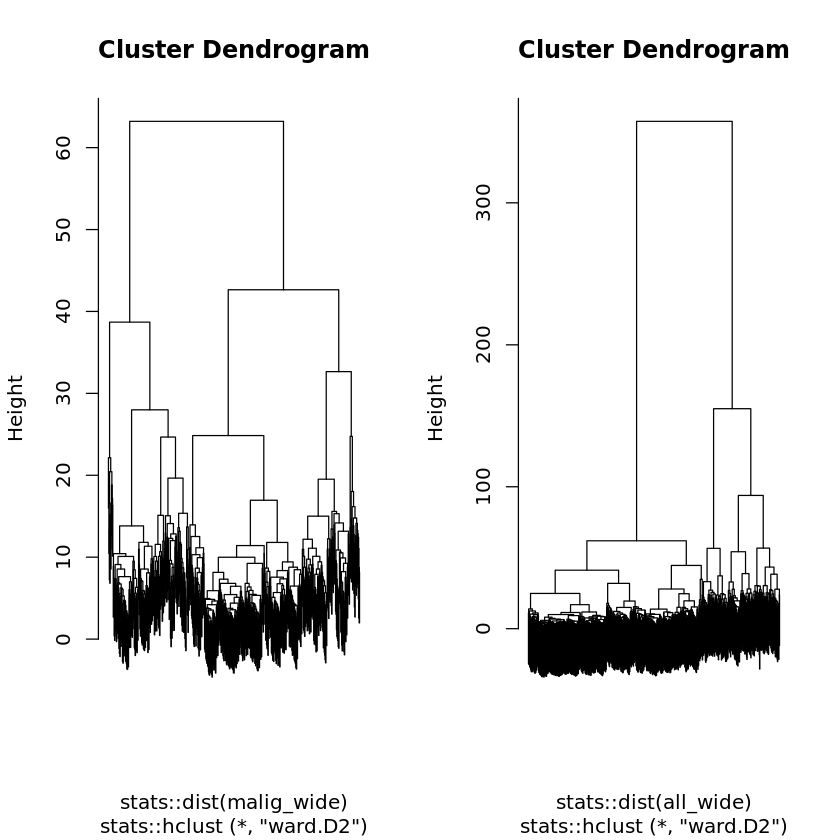

In [10]:
run_slide_cna(counts, 
              cells_df, 
              gene_pos,
              output_directory,
              plot_directory,
              spatial=FALSE)

#### Analyze Seurat Object of Slide-seq data

In [11]:
so <- readRDS(file=file.path(output_directory, "so.rds"))
md <- read.table(file=file.path(output_directory, "md_bin.txt"))

In [12]:
# TSNE Plots

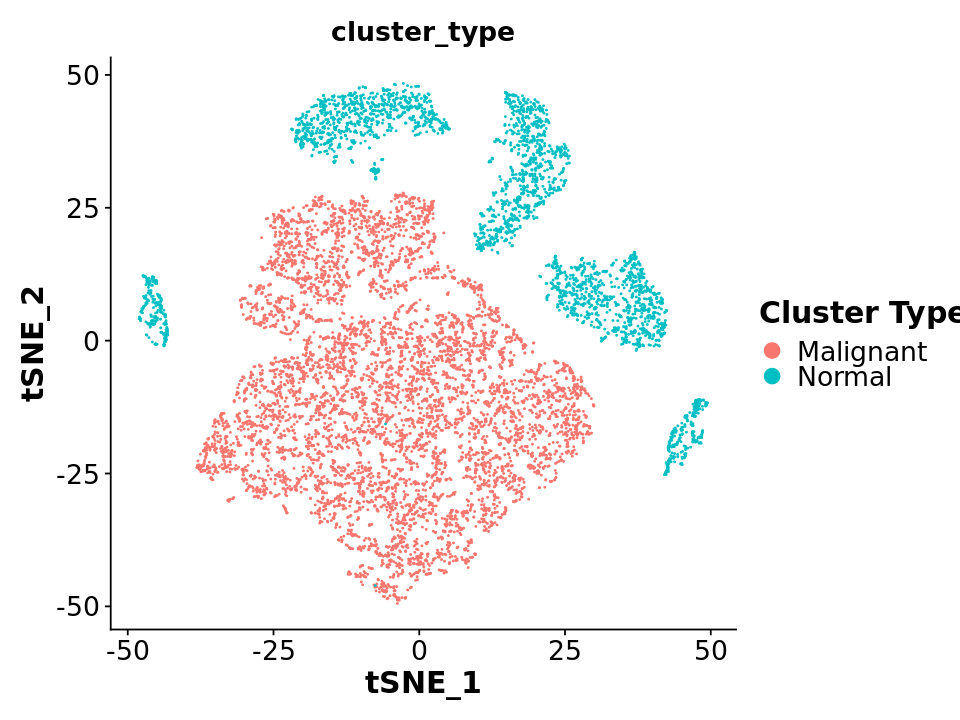

In [13]:
legend_title = "Cluster Type"
options(repr.plot.width = 8, repr.plot.height =6)
TSNEPlot(so, label.size = 18, group.by="cluster_type") +
    theme(axis.text=element_text(size=text_size), axis.title=element_text(size=title_size, face='bold'),
          legend.title=element_text(size=title_size, face='bold'), legend.text=element_text(size=text_size)) +
    labs(color = legend_title) +
    guides(color = guide_legend(override.aes = list(size = legend_size_pt)))

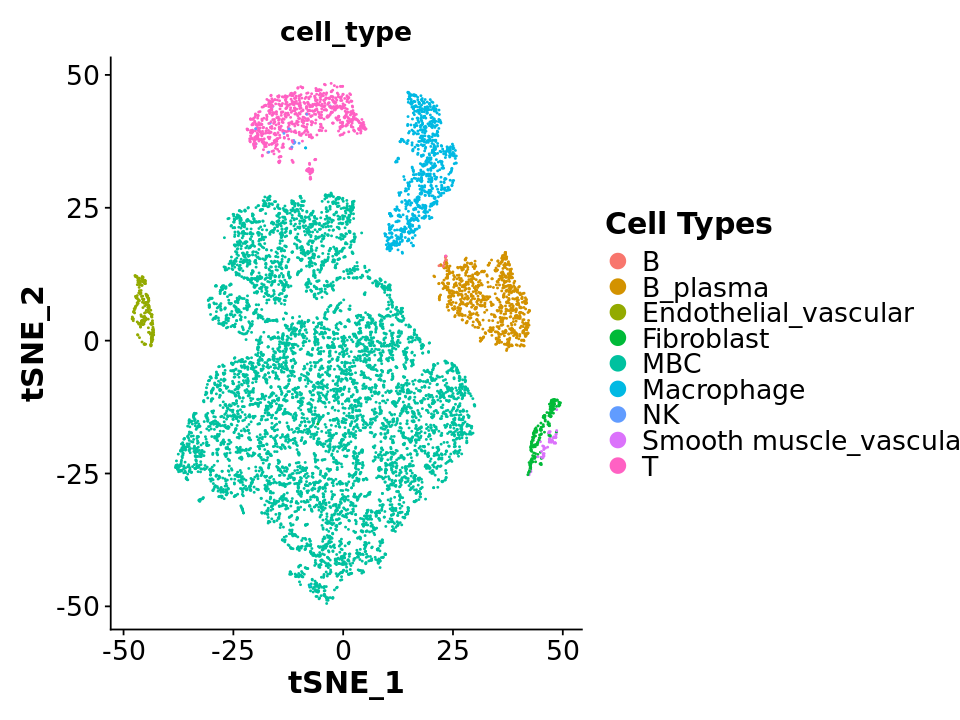

In [14]:
legend_title = "Cell Types"
options(repr.plot.width = 8, repr.plot.height =6)
TSNEPlot(so, label.size = 18, group.by="cell_type") +
    theme(axis.text=element_text(size=text_size), axis.title=element_text(size=title_size, face='bold'),
          legend.title=element_text(size=title_size, face='bold'), legend.text=element_text(size=text_size)) +
    labs(color = legend_title) +
    guides(color = guide_legend(override.aes = list(size = legend_size_pt)))

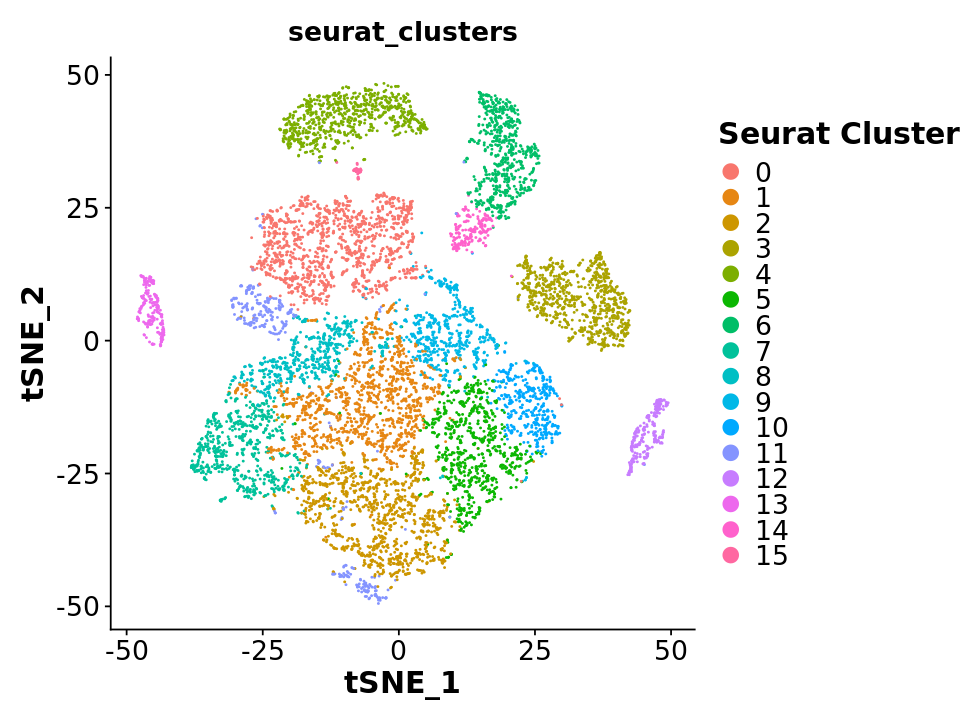

In [15]:
legend_title = "Seurat Clusters"
TSNEPlot(so, label.size = 18, group.by="seurat_clusters") +
    theme(axis.text=element_text(size=text_size), axis.title=element_text(size=title_size, face='bold'),
          legend.title=element_text(size=title_size, face='bold'), legend.text=element_text(size=text_size)) +
    labs(color = legend_title) +
    guides(color = guide_legend(override.aes = list(size = legend_size_pt)))